In [155]:
import scipy
import librosa
import numpy as np
import scipy.signal as signal
import os
from matplotlib import pyplot as plt
import random

In [156]:
maj_files_paths = np.empty(0, dtype=np.str_)
min_files_paths = np.empty(0, dtype=np.str_)

In [157]:
def f(n):
    return 2 ** ((n-49)/12) * 440

In [158]:
def build_scale():
    scale = np.zeros(13)
    for i in range(13):
        scale[i] = f(i + 49)
    return scale

In [159]:
scale = build_scale()
notes = librosa.hz_to_note(scale, octave=True)

In [160]:
maj_files = os.path.join(os.getcwd(),'Major_Minor_Classification','Data', 'major')
min_files = os.path.join(os.getcwd(),'Major_Minor_Classification','Data', 'minor')

In [161]:
def load_files(dirname):
    global maj_files_paths
    for filename in os.listdir(dirname):
        f = os.path.join(dirname, filename)
        # checking if it is a file
        if os.path.isfile(f):
            maj_files_paths = np.append(maj_files_paths,f)

In [162]:
def file_duration(filename):
    return librosa.get_duration(filename=filename)

In [167]:
load_files(maj_files)
sum = 0
arr = []
for i in maj_files_paths:
    c = file_duration(i)
    sum += c
    arr.append(c)
print(f'Average length of major set: {sum/len(maj_files_paths)}s')
print(f'Shortest length of major set: {min(arr)}s')
print(f'Longest length of major set: {max(arr)}s')

Average length of major set: 2.5510915192743777s
Shortest length of major set: 1.2145578231292518s
Longest length of major set: 6.350657596371882s


In [98]:
load_files(maj_files)
print(len(maj_files_paths))


250


In [131]:
randomlist = random.sample(range(0, len(maj_files_paths)-1), 1)
mfp = maj_files_paths[randomlist]

/home/makhmalbaf/Desktop/ML/Supervised-Learning/Major_Minor_Classification/Data/major/6_20.wav


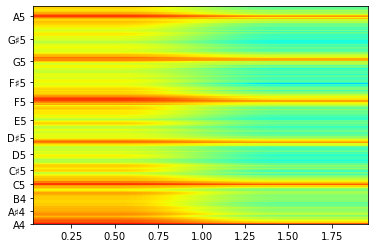

In [165]:
for p in mfp:
    print(p)
    sig, sr = librosa.load(p, mono=True)
    sr_n = 2000
    sig = librosa.resample(sig, orig_sr=sr, target_sr = sr_n)
    plt.specgram(sig, NFFT=int(4096/2), noverlap=120, Fs=sr_n, cmap = "jet")
    plt.ylim(scale[0], 900)
    plt.yticks(scale,notes)
    plt.show()

/home/makhmalbaf/Desktop/ML/Supervised-Learning/Major_Minor_Classification/Data/major/6_20.wav
22229707.5


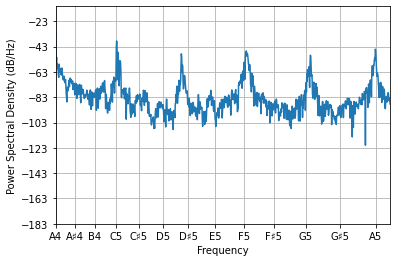

In [133]:
for p in mfp:
    print(p)
    sig, sr = librosa.load(p, mono=True)
    print( (sr * len(sig)) / 60)
    sr_n = 2000
    sig = librosa.resample(sig, orig_sr=sr, target_sr = sr_n)
    
    plt.psd(sig, NFFT=int(4096), noverlap=120,Fs=sr_n)
    plt.xlim(scale[0], 900)
    plt.xticks(scale,notes)
    plt.show()